In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn import svm

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [22]:
# Load the dataset
df = pd.read_csv('BMD-1.csv')
df.head()

,id,age,weight_kg,height_cm,bmd,fracture
0,469,57.052768,64.0,155.5,0.8793,no fracture
1,8724,75.741225,78.0,162.0,0.7946,no fracture
2,6736,70.778900,73.0,170.5,0.9067,no fracture
3,24180,78.247175,60.0,148.0,0.7112,no fracture
4,17072,54.191877,55.0,161.0,0.7909,no fracture


In [24]:
df.shape

(169, 6)

In [4]:
# Set Features and Target Variable
x = df[['age', 'weight_kg','height_cm','bmd']]
y = df['fracture']

# Preparing data into a suitable format for the ML algorithms

## 1. Normalize the dataset

In [25]:
from sklearn.preprocessing import MinMaxScaler

min_max_scale = MinMaxScaler()
df[['age', 'weight_kg','height_cm','bmd']] = min_max_scale.fit_transform(df[['age', 'weight_kg','height_cm','bmd']])

print(df)

        id       age  weight_kg  height_cm       bmd     fracture
0      469  0.401187   0.466667   0.385714  0.494030  no fracture
1     8724  0.754200   0.700000   0.571429  0.405320  no fracture
2     6736  0.660465   0.616667   0.814286  0.522727  no fracture
3    24180  0.801536   0.400000   0.171429  0.317972  no fracture
4    17072  0.347146   0.316667   0.542857  0.401445  no fracture
..     ...       ...        ...        ...       ...          ...
164  21892  0.796537   0.633333   0.628571  0.404797     fracture
165  24140  0.273353   0.383333   0.542857  0.407939     fracture
166   6969  0.199201   0.516667   0.771429  0.414851     fracture
167   5505  0.358413   0.566667   0.685714  0.418517     fracture
168     71  0.645654   0.541667   0.657143  0.480519     fracture

[169 rows x 6 columns]


The resulting normalized values represent the original data on 0 to 1 scale. So, 'age', 'weight_kg','height_cm','bmd' will all be on the same scale after normalization.

NOTE: In min-max normalization, the min value gets transformed into 0 and the max value gets transformed into 1. All values in-between get scaled to be within 0-1 range based on the original value relative to min and max values of the dataset.

## 2. Class Imbalance

In [26]:
# To see the distribution of the dataset.
df.fracture.value_counts()

no fracture    119
fracture        50
Name: fracture, dtype: int64

## Imbalanced dataset - 119 and 50. One class has more weight than the other class.

To handle imbalanced dataset, we can:
* Reduce the size of larger class
* Add to smaller class


### In this analysis, we will reduce the size of larger class.


In [27]:
df_majority = df[df['fracture'] == 'no fracture']
df_minority = df[df['fracture'] == 'fracture']


from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=96) 

# Combining minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.head()

,id,age,weight_kg,height_cm,bmd,fracture
68,8896,0.298122,0.300000,0.342857,0.385316,no fracture
111,23790,0.314778,0.383333,0.242857,0.339129,no fracture
40,55,0.706773,0.266667,0.314286,0.319648,no fracture
49,5509,0.775407,0.866667,0.714286,0.622015,no fracture
83,8999,0.461327,0.566667,0.457143,0.448890,no fracture


In [28]:
df_downsampled.fracture.value_counts()

fracture       50
no fracture    50
Name: fracture, dtype: int64

Now we have a perfectly balanced data.

# Split to X & Y

In [29]:
# Set Features and Target Variable
x = df_downsampled[['age', 'weight_kg','height_cm','bmd']]
y = df_downsampled['fracture']


## SUPPORT VECTOR MACHINE

SVMs are a set of supervised learning methods used for classification, regression, and outliers detection. 


* many features
* number of features > number of data points


#### Decision Boundary


* The two closest data points give you the support vectors you'll use to find that line. That line is called the decision boundary.

* The decision boundary doesn't have to be a line. It's also referred to as a hyperplane because you can find the decision boundary with any number of features, not just two.



There are two different types of SVMs, each used for different things:

* Simple SVM: Typically used for linear regression & classification problems.

* Kernel SVM: Has more flexibility for non-linear data because you can add more features to fit a hyperplane instead of a two-dimensional space.



### Kernel

SVM can be applied to both linearly separable and non-linearly separable datasets by using different kernel functions, such as linear, polynomial, and radial basis function (RBF). The choice of kernel function depends on the nature of the data and the problem being solved.

##### Linear Kernel

* simplest kernel function
* used when data can be easily separated by a straight line 

EG: in text classification, where goal is to separate documents into different categories based on the frequency of certain words.



##### Gaussian Kernel

* also known as radial basis function/RBF
* more flexible kernel function
* used to separate data that is not linearly separable
* distance metric used: Euclidean distance


EG: in image classification, where the goal is to identify objects in images based on their features, such as shape and texture.



# Hyperparameters: 



### C

* the penalty parameter 
* determines the trade-off between maximizing the margin and minimizing the classification error

* Smaller value of C creates a wider margin and allows more misclassifications
* Larger value of C creates a narrower margin and penalizes misclassifications more heavily 

* Essentially, C controls the balance between overfitting and underfitting in the model


Choosing the value of C is typically done through a process of hyperparameter tuning, where the performance of the SVM model is evaluated on a validation set for different values of C, and the value that gives the best performance is selected.




### Gamma

* defines how far the influence of a single training example reaches

* small gamma means a Gaussian kernel with a large variance, and thus the influence of each training example is broader

* large gamma means a Gaussian kernel with a small variance, and thus the influence of each training example is more localized

* gamma determines the flexibility of the decision boundary. A small gamma will result in a more generalized decision boundary, while a large gamma will result in a more complex decision boundary that can potentially overfit the training data.

* high value of gamma leads to overfitting, while a low value of gamma leads to underfitting.

# Create the SVM Classifier 

## 1. Linear

In [30]:
#create a classifier
linear_svm = svm.SVC(kernel="linear", C=1.0)

# Model Fitting

In [31]:
# Fit the model
linear_svm.fit(x,y)

SVC(kernel='linear')

# Prediction on Test data

In [32]:
y_pred = linear_svm.predict(x)

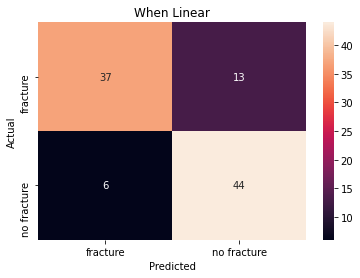

In [33]:
confusion_matrix = pd.crosstab(y, y_pred1, rownames=['Actual'], colnames=['Predicted'])
#print(confusion_matrix

sns.heatmap(confusion_matrix, annot=True)
plt.title('When Linear')

plt.show()

## 37+44 correct predictions (81 correctly clasified patients) and 6+13 incorrect predictions (21 incorrectly classified patients).

From the confusion matrix, we can see that the RF algorithm classified 37 correct predictions for the "fracture" class and 44 correct predictions for the "no fracture" class. It made 6 incorrect predictions for the "fracture" class, which were classified as "no fracture", and 13 incorrect predictiOns for the "no fracture" class, which were classified as "fracture".



# Evaluate the Model

* Accuracy Score
* Classification report

In [34]:
# Calculate accuracy of the model

accuracy = accuracy_score(y, y_pred)
print('Accuracy of SVM model with Linear Kernel', accuracy)

Accuracy of SVM model with Linear Kernel 0.81


In [35]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

    fracture       0.86      0.74      0.80        50
 no fracture       0.77      0.88      0.82        50

    accuracy                           0.81       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.81      0.81       100



## When Linear Kernel
#### Precision:

* Fracture class, precision is 0.86 ie. 86% of the cases predicted as fracture were actually fracture.
* No fracture class, precision is 0.77 ie. 77% of the cases predicted as no fracture were actually no fracture.

#### Recall:
* Fracture class, recall is 0.74 ie. 74% of the actual fracture cases were correctly identified.
* No fracture class, recall is 0.88 ie. 88% of the actual no fracture cases were correctly identified.

#### F1-score:
* Fracture class, F1-score is 0.80
* No fracture class, F1-score is 0.82.

Accuracy: The model has an accuracy of 81% which means it correctly predicted "fracture" or "no fracture" in 81 out of 100 patients.

The model's performance is good with an accuracy of 0.81.

## 2. Non-Linear Kernel / RBF

#Non-linear algorithm for model

In [36]:
# Create RF model
nonlinear_svm = svm.SVC(kernel='rbf', gamma =0.7, C=1.0)

# Fit the model
nonlinear_svm.fit(x,y)

# Predict
y_pred=nonlinear_svm.predict(x)

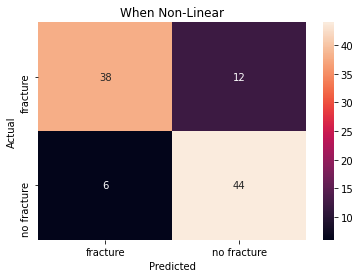

In [37]:
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
#print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.title('When Non-Linear')

plt.show()

## 38+44 correct predictions (82 correctly clasified patients) and 6+12 incorrect predictions (20 incorrectly classified patients).

From the confusion matrix, we can see that the RF algorithm classified 38 correct predictions for the "fracture" class and 44 correct predictions for the "no fracture" class. It made 6 incorrect predictions for the "fracture" class, which were classified as "no fracture", and 12 incorrect predictions for the "no fracture" class, which were classified as "fracture".

In [40]:
# Calculate accuracy of the model

accuracy = accuracy_score(y, y_pred)
print('Accuracy of SVM model with Gaussian Kernel', accuracy)

Accuracy of SVM model with Gaussian Kernel 0.82


In [41]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

    fracture       0.86      0.76      0.81        50
 no fracture       0.79      0.88      0.83        50

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



## When Non-Linear Kernel / RBF

#### Precision:

* Fracture class, precision is 0.86 ie. 86% of the cases predicted as fracture were actually fracture.
* No fracture class, precision is 0.79 ie. 79% of the cases predicted as no fracture were actually no fracture.

#### Recall:
* Fracture class, recall is 0.76 ie. 76% of the actual fracture cases were correctly identified.
* No fracture class, recall is 0.88 ie. 88% of the actual no fracture cases were correctly identified.

#### F1-score:
* Fracture class, F1-score is 0.81.
* No fracture class, F1-score is 0.83.

Accuracy: The model has an accuracy of 82% which means it correctly predicted "fracture" or "no fracture" in 82 out of 100 patients.

The model's performance is good with an accuracy of 0.82.

# Accuracy of SVM

### Linear Kernel

* Accuracy Score: 0.81

### RBF Kernel

* Accuracy Score: 0.82



The model with Linear Kernel model achieved a good accuracy score of 0.81, which is close to the accuracy score with Gaussian Kernal model of 0.82.

_________________________


# Comparison of SVM, RF, LR & KNN:


## 1. In terms of Accuracy Score

* SVM (Linear): 0.81
* SVM (RBF): 0.82

* RN (10 Trees): 0.99
* KNN(when k=7): 0.88
* LR: 0.80

 Therefore, Random Forrest with 10 trees performed better than SVM(linear & gaussian), LR & KNN in terms of accuracy score.

## 2. In terms of classfications:

#### Correct Classifications:

* SVM (Linear): 81 correct predictions
* SVM (RBF): 82

* RN (10 Trees): 99 
* KNN(when k=7): 88 
* LR: 80


#### Incorrect/Missclassifications:

* SVM (Linear): 21 incorrect predictions
* SVM (Non- Linear): 20

* RN (10 Trees): 1 
* KNN(when k=7): 12 
* LR: 20

So, Random Forrest with 10 trees has more correct classifications & less missclssifications compared to SVM(linear & gaussian), LR & KNN. Hence, Random Forrest is the better model!